In [3]:
import pandas as pd
import os
import numpy as np
import datetime
import pickle
import shutil
import glob
import re
def list_files_w_pattern(filepath, filetype):
   paths = []
   pat1 = r"[o,O]ld"
   pat2 = r"[o,O]ld"
   for root, dirs, files in os.walk(filepath):
      if re.search(pat1, root):
         pass
      else:
         for file in files:
            if file.lower().endswith(filetype.lower()):
               paths.append(os.path.join(root, file))
   return(paths)

def list_files(filepath, filetype):
   paths = []
   for root, dirs, files in os.walk(filepath):
      for file in files:
         if file.lower().endswith(filetype.lower()):
            paths.append(os.path.join(root, file))
   return(paths)

out_folder = "2019-2023-updated"

In [2]:
t = datetime.datetime.now()
timestring = f"{t.year:02d}{t.month:02d}{t.day:02d}-{t.hour:02d}{t.minute:02d}{t.second:02d}"
print(timestring)

20231013-091853


In [83]:
# Create Headers lists
# headers_2019 = list_files(r"Z:\__Organized_Directories_InProgress\2019_UnpackedCollects",'raw_image_headers.csv')
# with open(os.path.join(out_folder,"headers_2019.txt"), "wb") as fp:   #Pickling
#     pickle.dump(headers_2019, fp)
# headers_2020 = list_files(r"Z:\Headers2020",'raw_image_headers.csv')
# with open(os.path.join(out_folder,"headers_2020.txt"), "wb") as fp:   #Pickling
#     pickle.dump(headers_2020, fp)
# headers_2021 = list_files(r"Z:\Headers2021",'raw_image_headers.csv')
# with open(os.path.join(out_folder,"headers_2021.txt"), "wb") as fp:   #Pickling
#     pickle.dump(headers_2021, fp)
# headers_2022 = list_files(r"Z:\Headers2022",'raw_image_headers.csv')
# with open(os.path.join(out_folder,"headers_2022.txt"), "wb") as fp:   #Pickling
#     pickle.dump(headers_2022, fp)
# headers_2023 = list_files(r"Z:\Headers2023",'raw_image_headers.csv')
# with open(os.path.join(out_folder,"headers_2023.txt"), "wb") as fp:   #Pickling
#     pickle.dump(headers_2023, fp)
# miss_log_headers = list_files(r"Z:\HeadersCombined\mission_log_headers", 'raw_image_headers.csv')
# with open(os.path.join(out_folder,"miss_log_headers.txt"), "wb") as fp:   #Pickling
#     pickle.dump(miss_log_headers, fp)

In [3]:
## Load Headers Lists
with open(os.path.join(out_folder,"headers_2019.txt"), "rb") as fp:   #unpickling
    headers_2019 = pickle.load(fp)
with open(os.path.join(out_folder,"headers_2020.txt"), "rb") as fp:   
    headers_2020 = pickle.load(fp)
with open(os.path.join(out_folder,"headers_2021.txt"), "rb") as fp:   
    headers_2021 = pickle.load(fp)
with open(os.path.join(out_folder,"headers_2022.txt"), "rb") as fp:  
    headers_2022 = pickle.load(fp)
with open(os.path.join(out_folder,"headers_2023.txt"), "rb") as fp:   
    headers_2023 = pickle.load(fp)
with open(os.path.join(out_folder,"headers_miss_log.txt"), "rb") as fp:   
    headers_miss_log = pickle.load(fp)
headers = headers_2019 + headers_2020 + headers_2021 + headers_2022 + headers_2023 + headers_miss_log
# with open(os.path.join(out_folder,f"{timestring}_headers.txt"), "wb") as fp:   #Pickling
#     pickle.dump(headers, fp)
print(len(headers)) # 551

551


In [4]:
## creating lists of unpacked image names and paths

# images_2019 = list_files(r"Z:\__Organized_Directories_InProgress\2019_UnpackedCollects",'.png')
# with open(os.path.join(out_folder,"images_2019.txt"), "wb") as fp:   #Pickling
#     pickle.dump(images_2019, fp)
# images_2020 = list_files(r"Z:\__Organized_Directories_InProgress\2020_UnpackedCollects",'.png')
# with open(os.path.join(out_folder,"images_2020.txt"), "wb") as fp:   #Pickling
#     pickle.dump(images_2020, fp)
# images_2021 = list_files(r"Z:\__Organized_Directories_InProgress\2021_UnpackedCollects",'.png')
# with open(os.path.join(out_folder,"images_2021.txt"), "wb") as fp:   #Pickling
#     pickle.dump(images_2021, fp)
# images_2022 = list_files(r"Z:\__Organized_Directories_InProgress\2022_UnpackedCollects",'.png')
# with open(os.path.join(out_folder,"images_2022.txt"), "wb") as fp:   #Pickling
#     pickle.dump(images_2022, fp)
# images_2023 = list_files(r"Z:\__Organized_Directories_InProgress\2023_UnpackedCollects",'.png')
# with open(os.path.join(out_folder,"images_2023.txt"), "wb") as fp:   #Pickling
#     pickle.dump(images_2023, fp)



In [4]:
## Loading Images Lists
with open(os.path.join(out_folder,"images_2019.txt"), "rb") as fp:   #unpickling
    images_2019 = pickle.load(fp)
with open(os.path.join(out_folder,"images_2020.txt"), "rb") as fp:   
    images_2020 = pickle.load(fp)
with open(os.path.join(out_folder,"images_2021.txt"), "rb") as fp:   
    images_2021 = pickle.load(fp)
with open(os.path.join(out_folder,"images_2022.txt"), "rb") as fp:  
    images_2022 = pickle.load(fp)
with open(os.path.join(out_folder,"images_2023.txt"), "rb") as fp:   
    images_2023 = pickle.load(fp)
image_list = images_2019 + images_2020 + images_2021 + images_2022 + images_2023
print(len(image_list)) # 2035662 2041537

2041537


In [5]:
## Dataframe of all unpacked images and their paths
df_imgs = pd.DataFrame(image_list, columns=["image_path"])
im = lambda x: os.path.basename(x)
df_imgs["image_name"] = df_imgs.image_path.map(im)
df_imgs["image_name"] = df_imgs.image_path.map(im)
df_imgs = df_imgs.drop_duplicates(subset="image_name")
df_imgs.to_pickle(os.path.join(out_folder,"2019-2023_imgs.pickle"))
print(df_imgs.shape) # (1993212, 2) (2009213, 2)

(2009213, 2)


In [6]:
df_imgs = pd.read_pickle(os.path.join(out_folder,"2019-2023_imgs.pickle"))
print(df_imgs.shape) # (1948911, 2) (1993212, 2)
df_imgs.head()

(2009213, 2)


,image_path,image_name
0,Z:\__Organized_Directories_InProgress\2019_Unp...,charts.png
1,Z:\__Organized_Directories_InProgress\2019_Unp...,prescreen_charts.png
2,Z:\__Organized_Directories_InProgress\2019_Unp...,image_raw_00001536.png
3,Z:\__Organized_Directories_InProgress\2019_Unp...,image_raw_00003144.png
4,Z:\__Organized_Directories_InProgress\2019_Unp...,image_raw_00004751.png


In [ ]:
def print_col_len(headers_paths):
    col_lens = []
    for path in headers_paths:
        length = len(pd.read_csv(path, header=0).columns)
        col_lens.append(length)
    return np.unique(np.array(col_lens), return_counts=True)
# print_col_len(headers)

In [7]:
columns_ = ["image_name", "Heading_D", "Pitch_D", "Roll_D", "Temp_C", "AUV_depth_m", "Alt_m", "INS - Altitude",	"DTB Height(m)", "Salinity_ppt", "Speed_kn", "INS - Speed_mps", "Lat_DD", "Long_DD", "CreationTime", "EpochTime","Usability"]
# Created this dictionary to force similar column names into the same name, ie 'Latitude (decimal degrees)' --> 'Lat_DD'
header_dict = {'image_name': 'image_name', 'Unnamed: 0':'image_name','image_filename':'image_name',
                'Heading_D':'Heading_D' ,'Heading (degrees)':'Heading_D','INS Heading':'Heading_D',
                'Pitch_D':'Pitch_D','Pitch (degrees)':'Pitch_D', 'Pitch Angle':'Pitch_D',
                'Roll_D': 'Roll_D', 'Roll (degrees)': 'Roll_D','Roll Angle':'Roll_D',
                'Temp_C': 'Temp_C', 'Temperature (C)': 'Temp_C','Temperature (c)':'Temp_C',
                'AUV_depth_m':'AUV_depth_m', 'Depth (m)':'AUV_depth_m','DFS Depth(m)':'AUV_depth_m',
                'Alt_m' : 'Alt_m', 'Altitude (m)':'Alt_m',
                'DTB Height(m)':'Alt_m',
                'Salinity_ppt': 'Salinity_ppt', 'Salinity (ppt)':'Salinity_ppt','Salinity (ppt)':'Salinity_ppt',
                'CreationTime':'CreationTime', 'Creation Time':'CreationTime',
                'EpochTime':'EpochTime',
                'Speed_kn':'Speed_kn', 'Speed (knots)':'Speed_kn','GPS Speed (Kn)': 'Speed_kn', 'INS X Speed (m/s)':'INS - Speed_mps',
                'Lat_DD': 'Lat_DD', 'Latitude':'Lat_DD', 'Latitude (decimal degrees)':'Lat_DD',       
                'Long_DD': 'Long_DD', 'Longitude':'Long_DD','Longitude (decimal degrees)':'Long_DD'
                }


In [42]:
def combine_headers(headers_paths, df_input = None):
    dfs = []
    if df_input is None:
        df = pd.DataFrame(columns=columns_)
    else:
        df = df_input
    for path in headers_paths:
        tempdf = pd.read_csv(path, header=0)
        tempdf.rename(columns=header_dict, inplace=True)
        newcolumns = tempdf.columns[tempdf.columns.isin(columns_)]
        dfs = [df, tempdf[newcolumns]]
        df = pd.concat(dfs, axis=0, ignore_index=True)
        df = df.dropna(subset="EpochTime")
        # df = df.dropna(axis=1, how='all')
        df = df.drop_duplicates()
        

    df = df.sort_values(by="EpochTime")
    # df = df.drop_duplicates(subset="image_name")
    im = lambda x: os.path.basename(x)
    df["image_name"] = df.image_name.apply(im)
    dt = lambda x : datetime.datetime.fromtimestamp(x)
    df['Datetime'] = df['EpochTime'].apply(dt)

    return df.drop_duplicates()

### Combining All Headers

In [43]:
# last_headers_file = glob.glob(os.path.join(out_folder,"*_headers.txt"))[-2]
# updated_headers = headers_miss_log
# updated_headers = []
# ## read and add new header info
# df = pd.read_pickle(os.path.join(out_folder,"2019-2023_headers_combined.pickle"))
# print(df.shape) # (4199718, 17)
# ## inputing new headers that were added
# df = combine_headers(headers_paths=updated_headers, df_input = df)
# df.to_pickle(os.path.join(out_folder,"2019-2023_headers_combined.pickle"))
# print(df.shape) # (4088572, 17)

(4199718, 17)
(4088572, 17)


In [44]:
df = pd.read_pickle(os.path.join(out_folder,"2019-2023_headers_combined.pickle"))
print(df.shape) # (4088572, 17)

(4088572, 17)


In [45]:
## Cleaning for Altitude and depth
df = df[(df.Alt_m<4) & (df.AUV_depth_m > 1)]
## Cleaning lat lon columns
idx_bad_lat = df[(df['Lat_DD'] < 41) | (df['Lat_DD'] > 50)].index
idx_bad_lon = df[(df['Long_DD'] < -92.5) | (df['Long_DD'] > -75.5)].index
df.loc[idx_bad_lat, 'Lat_DD'] = np.nan
df.loc[idx_bad_lon, 'Long_DD'] = np.nan
df.to_pickle(os.path.join(out_folder, "2019-2023_headers_combined_filtered.pickle"))
print(df.shape) # (2416264, 86) (2417064, 86) (2418247, 89) (2434252, 87) (2492433, 17) (2692480, 17)

(2499505, 17)


In [46]:
df = pd.read_pickle(os.path.join(out_folder, "2019-2023_headers_combined_filtered.pickle"))
df.shape # (2418247, 87) (2434252, 87) (2492433, 17) (2692480, 17)

(2499505, 17)

array([[<Axes: title={'center': 'Datetime'}>]], dtype=object)

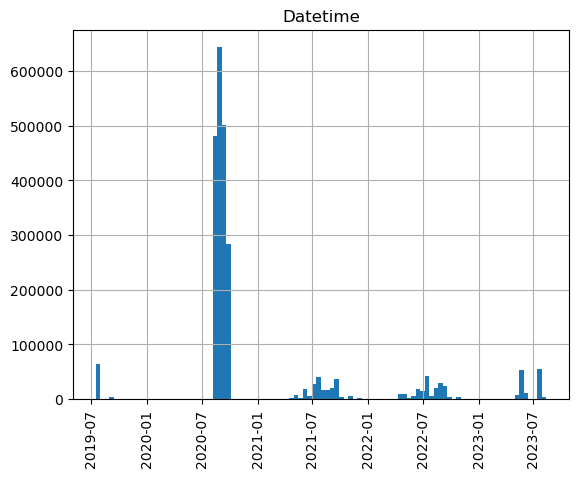

In [47]:
df.hist(column='Datetime', bins=100, xrot=90)

In [48]:
# merging and keeping only image names that are unpacked
df_unp = df[df.image_name.isin(df_imgs.image_name)]
df_unp = pd.merge(df, df_imgs, on="image_name")
df_unp.to_pickle(os.path.join(out_folder, "2019-2023_unpacked_imgs_headers.pickle"))
print(df_unp.shape) # (597986, 87) (598786, 87) (599180, 90) (588246, 88) (627826, 18) (636013, 18)


(636013, 18)


In [146]:
df_unp = pd.read_pickle(os.path.join(out_folder, "2019-2023_unpacked_imgs_headers.pickle"))
print(df_unp.shape) # (599180, 90) (588246, 88) (627826, 18) (636013, 18)

(636013, 18)


In [147]:
# Dataframe with all of collects on file. This created in Mapping_reefs
df_collects = pd.read_csv("collects_lat_lon.csv", index_col=0).sort_values(by="date")
df_collects.date = pd.to_datetime(df_collects.date, format="%Y-%m-%d")

In [148]:
## Here I add collect ID, AUV ID, and camera system columns
df_unp['Datetime'] = pd.to_datetime(df_unp.Datetime, format='mixed')
df_unp = df_unp.sort_values(by='Datetime')
## Extracting collect id from filepaths where possible
df_unp['collect_id'] = df_unp["image_path"].str.extract(r'([0-9]{8}_[0-9]{3}_[a-z,A-Z]+[0-9][0-9][0-9][0-9]_[a-z,A-Z]+[0-2])')
## Where there are no collect id in filepaths use the date index
tmp_idx = df_unp[df_unp.collect_id.isna()].index
df_tmp = pd.merge_asof(df_unp.loc[tmp_idx,"Datetime"], df_collects.loc[:,["date","collect_id"]], left_on="Datetime", right_on="date")
df_unp.loc[tmp_idx, "collect_id"] = df_tmp["collect_id"]
df_unp['AUV'] = df_unp["collect_id"].str.extract(     r'[0-9]{8}_[0-9]{3}_([a-z,A-Z]+[0-9][0-9][0-9][0-9])_[a-z,A-Z]+[0-2]')
df_unp['cam_sys'] = df_unp["collect_id"].str.extract( r'[0-9]{8}_[0-9]{3}_[a-z,A-Z]+[0-9][0-9][0-9][0-9]_([a-z,A-Z]+[0-2])')
## Where usability is blank
nu_idx = df_unp[df_unp.Usability.isna()].index
nu_idx_usability = df_unp.loc[nu_idx,"image_path"].str.extract(r'\W+([a-z,A-Z]*sab[a-z,A-Z]+).*')
df_unp.loc[nu_idx, "Usability"] = nu_idx_usability.values

df_unp.to_csv("all_unpacked_images_metadata.csv")
print(df_unp.shape) # (599180, 19) (588246, 19) (627826, 21) (636013, 21)

(636013, 21)


In [144]:
tmp = df_unp.loc[213751:213756,["Usability", "image_path"]]
tidx = tmp.Usability.isna().index
tidx_usability = tmp.loc[tidx,"image_path"].str.extract(r'\W+([a-z,A-Z]*sab[a-z,A-Z]+).*')
tmp.loc[tidx, "Usability"] = tidx_usability.values

In [145]:
tmp

,Usability,image_path
213751,unusable,Z:\__Organized_Directories_InProgress\2021_Unp...
213752,unusable,Z:\__Organized_Directories_InProgress\2021_Unp...
213753,unusable,Z:\__Organized_Directories_InProgress\2021_Unp...
213754,unusable,Z:\__Organized_Directories_InProgress\2021_Unp...
213755,unusable,Z:\__Organized_Directories_InProgress\2021_Unp...
213756,usable,Z:\__Organized_Directories_InProgress\2021_Unp...


### Finished with creating metatadata

array([[<Axes: title={'center': 'Datetime'}>]], dtype=object)

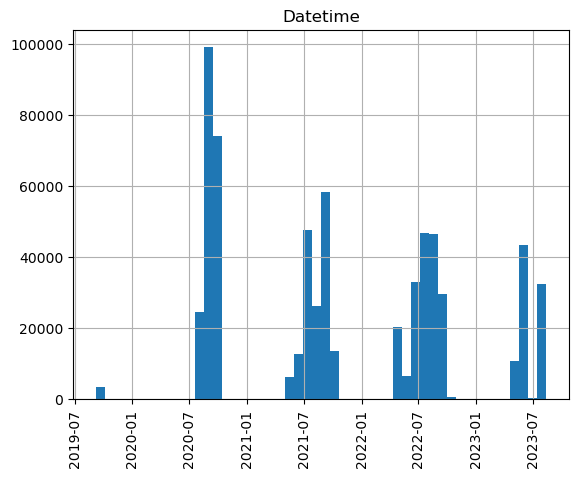

In [52]:
df_unp.hist(column='Datetime', bins=50, xrot=90)

In [53]:
df_unp = pd.read_csv('all_unpacked_images_metadata.csv', index_col=0, low_memory=False)
df_unp.Long_DD.describe()
df_unp.Lat_DD.describe()
df_unp.Long_DD.isna().sum()
df_unp.Lat_DD.isna().sum()

3419

### Interpolating bad Lat lon

20210828_001_Iver3069_ABS1


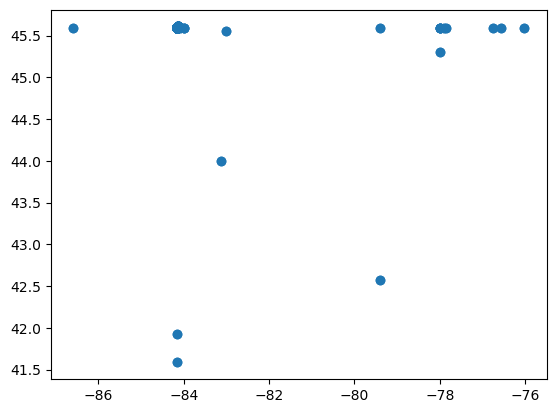

In [24]:
import matplotlib.pyplot as plt
collects_bad_lat_lon = list(df_unp[df_unp.Lat_DD.isna() | df_unp.Long_DD.isna()].groupby("collect_id").groups.keys())
pd.DataFrame(collects_bad_lat_lon).to_csv("list_collects_bad_lat_lon.csv")
idx = 12
file = collects_bad_lat_lon[idx]
Lat = df_unp[df_unp.collect_id == collects_bad_lat_lon[idx]].Lat_DD
Long = df_unp[df_unp.collect_id == collects_bad_lat_lon[idx]].Long_DD
print(file)
plt.scatter(Long, Lat)
# 20210707_001_Iver3069_ABS1, 20210708_001_Iver3069_ABS1, 20210712_001_Iver3069_ABS1, 20210725_001_Iver3069_ABS1, 20210728_001_Iver3069_ABS1